📚 Project Overview: Student Habits & Academic Performance

Introduction.

This project explores how various lifestyle habits influence academic outcomes in students. Using a simulated dataset of 1,000 students, the goal is to uncover patterns and correlations between behaviors like studying, sleeping, screen time, and physical activity — and their impact on exam performance and mental health.

The dataset is from Kaggle: Student Habits vs Academic Performance.

Table of contents

Asking Questions
Data Wrangling
Exploratory Data Analysis
Conclusions

Asking Questions: 

Based on dataset we are interested to know: 

Q1: Are students who study more performing better? 
Q2: Is regular class attendance linked to higher performance? 
Q3: Does getting more sleep correlate with better mental health?
Q4: Are higher screen time habits linked to lower performance?
Q5: Do students with better health habits score higher?
Q6: Is physical activity associated with well-being?
Q7: Are there noticeable trends in study habits or scores by gender?
Q8: Do students with highly educated parents perform better?
Q9: Identify groups like “high achievers,” “distracted students,” or “balanced lifestyle”.

Data Wrangling

We will set up the environment, import and evaluate the dataset. Then, we will refine and prepare the data for analysis.

Preparing the enviroment:

In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib as plt
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import pointbiserialr
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Import CSV
file_path = r"D:\Github Project\student_habits_performance.csv"
df = pd.read_csv(file_path)

Assess Data 

In this step, we view the dataset and get the basic information. 

In [4]:
#View first 3 rows
print("\nFirst 5 rows of the DataFrame:")
print(df.head(3))


First 5 rows of the DataFrame:
  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   

   mental_health_rating extracurricular_participation  exam_score  
0                

In [5]:
# Basic information of dataset
print("DataFrame Info:")
print(df.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               10

In [6]:
#Check for duplicates
df.duplicated().sum()

0

In [7]:
print("\nBasic Statitics:")
print(df.describe())


Basic Statitics:
             age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.20

Exploratory Analysis:

Q1: Are students who study more performing better? 

Lets analyze the study hours per day and the exam score.

In [9]:
corr = round(df["study_hours_per_day"].corr(df["exam_score"]),2)
print(corr)

0.83


A correlation coefficient of 0.83 between hours of study and exam score indicates a strong positive relationship. The value 0.83 is close to 1, showing a strong correlation. This means that as the hours of study increase, the exam scores tend to increase as well.

Text(0.5, 1.0, 'Study Hours vs Exam Score (r = 0.83)')

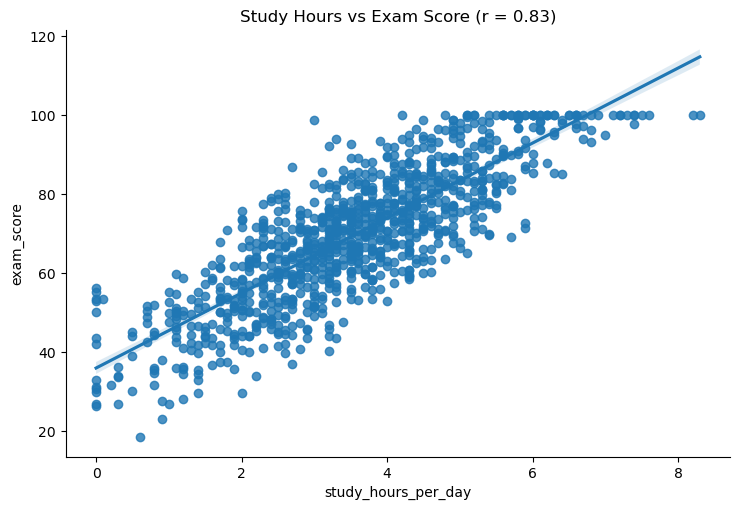

In [11]:
# Study Hours vs Exam Score
# Create the plot and assign to a variable
g = sns.lmplot(x='study_hours_per_day', y='exam_score', data=df, height=5, aspect=1.5)

# Set the title using the figure's Axes
g.ax.set_title('Study Hours vs Exam Score (r = 0.83)')


Q2: Is regular class attendance linked to higher performance? 

0.09


Text(0.5, 0.98, 'Attendance vs Exam Score (r = 0.99)')

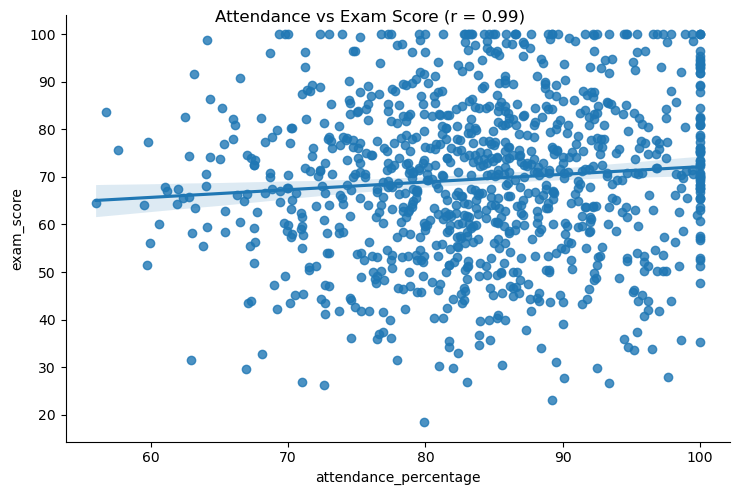

In [13]:
att_corr = round(df['attendance_percentage'].corr(df['exam_score']), 2)
print(att_corr)

# Create the lmplot and store the FacetGrid object
g = sns.lmplot(x='attendance_percentage', y='exam_score', data=df, height=5, aspect=1.5)

# Set the title on the FacetGrid
g.fig.suptitle('Attendance vs Exam Score (r = 0.99)')

A correlation coefficient of 0.09 between attendance percentage and exam score indicates a very weak positive relationship.
The value 0.09 is very close to 0, showing a weak correlation. This means there’s little to no meaningful linear relationship between attendance percentage and exam scores.

Q3: Does getting more sleep correlate with better mental health?

-0.01


Text(0.5, 0.98, 'Attendance vs Exam Score (r = -0.01)')

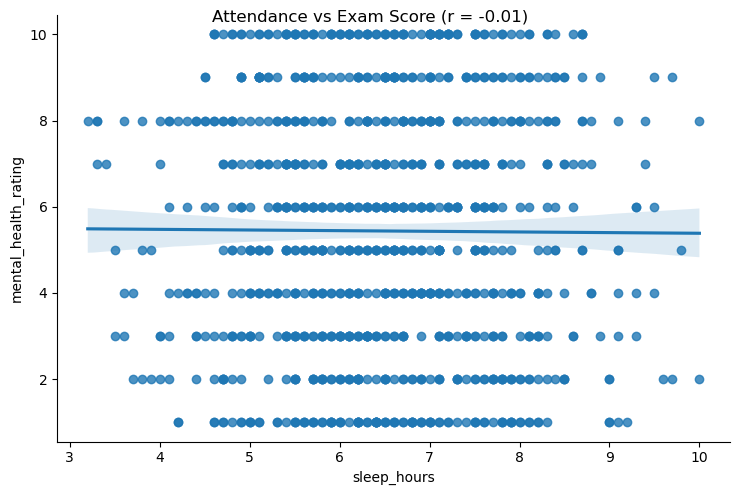

In [16]:
mental_corr = round(df["sleep_hours"].corr(df["mental_health_rating"]),2)
print(mental_corr)
g = sns.lmplot(x="sleep_hours", y="mental_health_rating", data=df, height=5, aspect =1.5)
g.fig.suptitle('Attendance vs Exam Score (r = -0.01)')

A correlation coefficient of -0.01 between sleep hours and mental health rating indicates a very weak negative relationship.
The value -0.01 is very close to 0, showing a weak correlation. This means there’s little to no meaningful linear relationship between sleep hours and mental health rating.

Q4: Are higher screen time habits linked to lower performance?

Correlation between Social Media Hours and Exam Score: -0.17
Correlation between Netflix Hours and Exam Score: -0.17


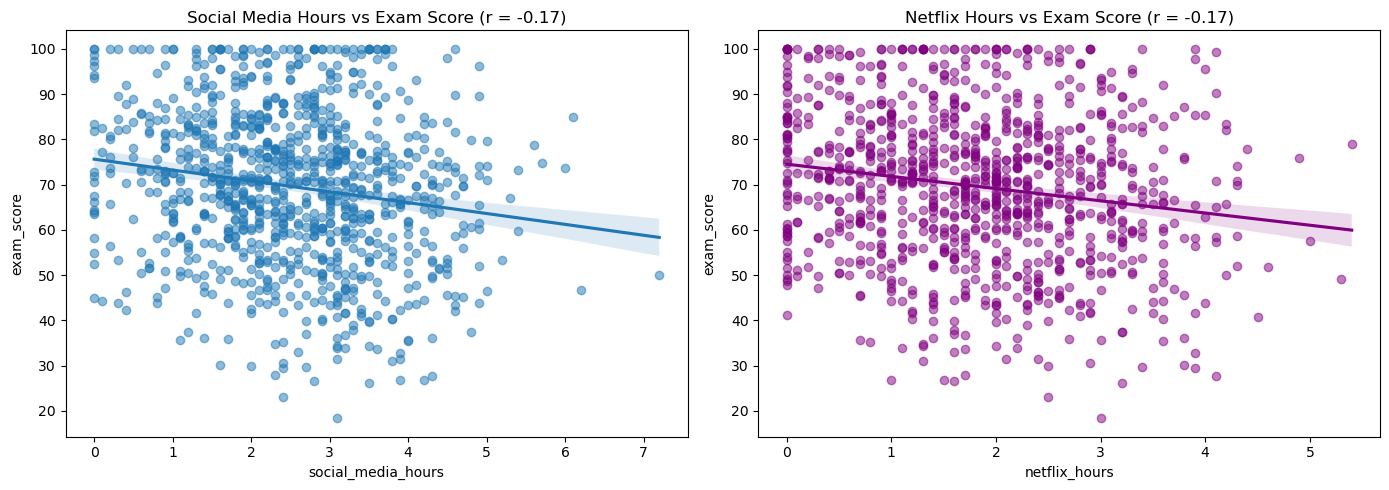

In [19]:
import matplotlib.pyplot as plt
social_corr = round(df["social_media_hours"].corr(df["exam_score"]),2)   
netflix_corr = round(df["netflix_hours"].corr(df["exam_score"]),2)
print(f"Correlation between Social Media Hours and Exam Score: {social_corr}")
print(f"Correlation between Netflix Hours and Exam Score: {netflix_corr}")

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
sns.regplot(x='social_media_hours', y='exam_score', data=df, scatter_kws={'alpha':0.5})
plt.title(f'Social Media Hours vs Exam Score (r = {social_corr})')

# Netflix vs Exam Score
plt.subplot(1, 2, 2)
sns.regplot(x='netflix_hours', y='exam_score', data=df, scatter_kws={'alpha':0.5}, color='purple')
plt.title(f'Netflix Hours vs Exam Score (r = {netflix_corr})')
plt.tight_layout()
plt.show()

The value -0.17 is close to 0, showing a weak correlation. This means there’s a slight linear relationship between screen time habits and exam scores, but it’s not strong.  The negative sign (-0.17) indicates a negative relationship—more screen time is associated with slightly lower exam scores.

Q5: Do students with better health habits score higher?

Lets first take a look of how the diet quality column is represented in our dataset: 

In [22]:
print("Unique values in diet_quality:", df['diet_quality'].unique())

Unique values in diet_quality: ['Fair' 'Good' 'Poor']


Now that we know the values, lets transform them to find a correlation with the exam score column. 

In [24]:
df["diet_quality_ranked"] = df["diet_quality"].map({"Poor":1, "Fair": 2, "Good" : 3})
correlation, p_value = stats.spearmanr(df["diet_quality_ranked"], df["exam_score"])
print(f"Spearmans´s correlation coefficient: {correlation:.3f}")

Spearmans´s correlation coefficient: 0.014


A correlation of 0.014 suggests that diet quality has almost no effect on exam scores in your dataset, and you should explore other factors for more meaningful insights.

Q6: Is physical activity associated with well-being?

In [27]:
exercise_corr = round(df["exercise_frequency"].corr(df["exam_score"]),2)
print(exercise_corr)

0.16


With such a low correlation, exercise frequency isn’t a major factor in determining exam performance. 

Q7: Are there noticeable trends in study habits or scores by gender?

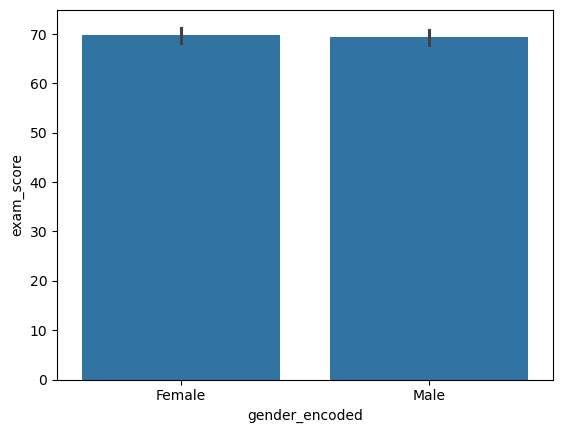


Male average exam score: 69.37

Female average exam score: 69.74


In [30]:
df_binary = df[df['gender'].isin(['Female', 'Male'])].copy()

# Encode gender as binary (0 = Female, 1 = Male)
df_binary['gender_encoded'] = df_binary['gender'].map({'Female': 0, 'Male': 1})

sns.barplot(x="gender_encoded", y="exam_score", data=df_binary)
plt.xticks([0, 1], ['Female', 'Male'])  # Customize labels
plt.show()

male_avg = round(df_binary[df_binary["gender_encoded"] == 1]["exam_score"].mean(),2)
female_avg = round(df_binary[df_binary["gender_encoded"] == 0]["exam_score"].mean(),2)
print("\nMale average exam score:", male_avg)
print("\nFemale average exam score:", female_avg)

The average exam scores for females and males are very similar, with a difference of less than 1 point. This suggests that gender does not have a substantial impact on exam performance in this dataset.

Q8: Do students with highly educated parents perform better?

In [33]:
print("Parental education level:", df["parental_education_level"].unique())
df_cleaned = df.dropna(subset=["parental_education_level"]).copy()
df_cleaned["parental_education_ranked"] = df_cleaned["parental_education_level"].map({"Master": 1, "Bachelor" : 2, "High School" : 3})
parental_corr =  df_cleaned["parental_education_ranked"].corr(df_cleaned["exam_score"])
print(parental_corr)

Parental education level: ['Master' 'High School' 'Bachelor' nan]
0.02109337539701165


The results suggest that parental education level has little to no impact on exam scores, based on this data and ranking method.

Q9: Identify groups like “high achievers,” “distracted students,” or “balanced lifestyle”.

                   study_hours_per_day  social_media_hours  netflix_hours  \
lifestyle_cluster                                                           
0                                  3.0                 2.4            2.5   
1                                  3.6                 2.1            1.1   
2                                  3.9                 2.9            1.8   

                   sleep_hours  exercise_frequency  attendance_percentage  \
lifestyle_cluster                                                           
0                          6.0                 4.4                   86.7   
1                          7.1                 3.9                   78.7   
2                          6.4                 1.2                   86.4   

                   exam_score  
lifestyle_cluster              
0                        64.5  
1                        74.9  
2                        69.5  


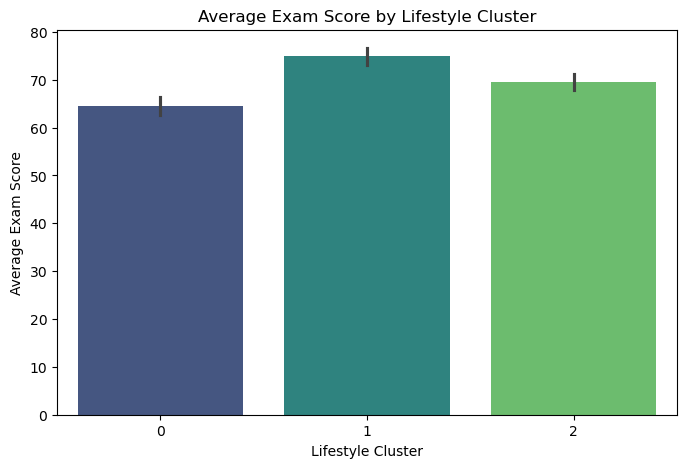

In [56]:
# Select relevant features
features = [
    'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'sleep_hours', 'exercise_frequency', 'attendance_percentage'
]

X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['lifestyle_cluster'] = kmeans.fit_predict(X_scaled)

# Analyze cluster profiles
cluster_profiles = df.groupby('lifestyle_cluster')[features + ['exam_score']].mean().round(1)
print(cluster_profiles)

# Visualize: Average Exam Score per Cluster
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='lifestyle_cluster', y='exam_score', palette='viridis')
plt.title("Average Exam Score by Lifestyle Cluster")
plt.xlabel("Lifestyle Cluster")
plt.ylabel("Average Exam Score")
plt.show()

We have applied KMeans clustering to a dataset with features related to lifestyle habits (study_hours_per_day, social_media_hours, netflix_hours, sleep_hours, exercise_frequency, attendance_percentage) to group individuals into 3 clusters. The features were standardized using StandardScaler to ensure fair comparison acrros different scales. After clustering, we calculated the mean values of each feature (and exam_score) for each cluster and visualized the average exam_score per cluser.

Cluster Profiles.

The table shows the average values of each feature and exam_score for the 3 clusters (labeled 0, 1 and 2): 

Cluster 0:
Study Hours: 3.0

Social Media Hours: 2.4

Netflix Hours: 2.5

Sleep Hours: 6.0

Exercise Frequency: 4.4

Attendance Percentage: 86.7

Exam Score: 64.5

Cluster 1:
Study Hours: 3.6

Social Media Hours: 0.9

Netflix Hours: 1.1

Sleep Hours: 7.1

Exercise Frequency: 3.9

Attendance Percentage: 78.7

Exam Score: 74.9

Cluster 2:
Study Hours: 3.9

Social Media Hours: 2.9

Netflix Hours: 1.8

Sleep Hours: 6.4

Exercise Frequency: 1.2

Attendance Percentage: 86.4

Exam Score: 69.5

Interpretation of Clusters
Based on the profiles, we can characterize the clusters:
Cluster 0: Balanced but less studious
Moderate study hours (3.0), but spends significant time on social media (2.4) and Netflix (2.5).

Sleeps the least (6.0 hours), exercises frequently (4.4), and has high attendance (86.7%).

Lowest exam score (64.5), possibly due to distractions from social media and Netflix despite good attendance and exercise habits.

Cluster 1: Disciplined and focused
Higher study hours (3.6), minimal time on social media (0.9) and Netflix (1.1).

Sleeps the most (7.1 hours), exercises moderately (3.9), but has the lowest attendance (78.7%).

Highest exam score (74.9), likely due to focused study habits, low distractions, and adequate sleep, even with lower attendance.

Cluster 2: Studious but less active
Highest study hours (3.9), moderate social media use (2.9), and low Netflix time (1.8).

Moderate sleep (6.4 hours), exercises the least (1.2), and has high attendance (86.4%).

Exam score (69.5) is better than Cluster 0 but lower than Cluster 1, possibly because of lower exercise frequency and slightly higher distractions from social media.




The bar plot shows the average exam_score for each cluster: 

Cluster 0: 64.5 (lowest)
Cluster 1: 74.9 (highest)
Cluster 2: 69.5 (middle)

This visually confirms that Cluster 1 has the highest average exam score, followed by Cluster 2 and Cluster 0 has the lowest. 

Conclusions: 

Study habits and distractions matter: Cluster 1, with more study hours and minimal social media/Netflix time, achieves the highest exam scores. Cluster 0 with more distractions, has the lowest scores despite good attendance and exercise. 

Sleep might play a role: Cluster 1, with the most sleep (7.1 hours), performs best, while Cluster 0, with the least sleep (6.0 hours), performs worst.

Exercise and attendance aren’t enough alone: Cluster 0 exercises the most and has high attendance but still scores poorly, likely due to distractions. Cluster 2, with high attendance but low exercise, scores better than Cluster 0 but not as well as Cluster 1.

Attendance isn’t the deciding factor: Cluster 1 has the lowest attendance (78.7%) but the highest scores, suggesting that focused study and low distractions can outweigh attendance.